In [2]:
import os
import netCDF4 as nc
import numpy as np
from statistics import mean
from decimal import Decimal
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
import math
import random
from scipy.spatial.distance import cdist
from numpy import array
from matplotlib import path

In [3]:
land = np.load('land_new.npy')
print(land.shape)
land

(3584, 2432)


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int16)

In [4]:
points=[]
for y in range(0,3584):
    for x in range(0,2432):
        point=[]
        point.append(y)
        point.append(x)
        points.append(point)

In [6]:
point_water=[]
for point in points:
    y=point[0]
    x=point[1]
    if land[y,x] ==1:
        point_water.append(point)

In [8]:
points_array = np.asarray(point_water)

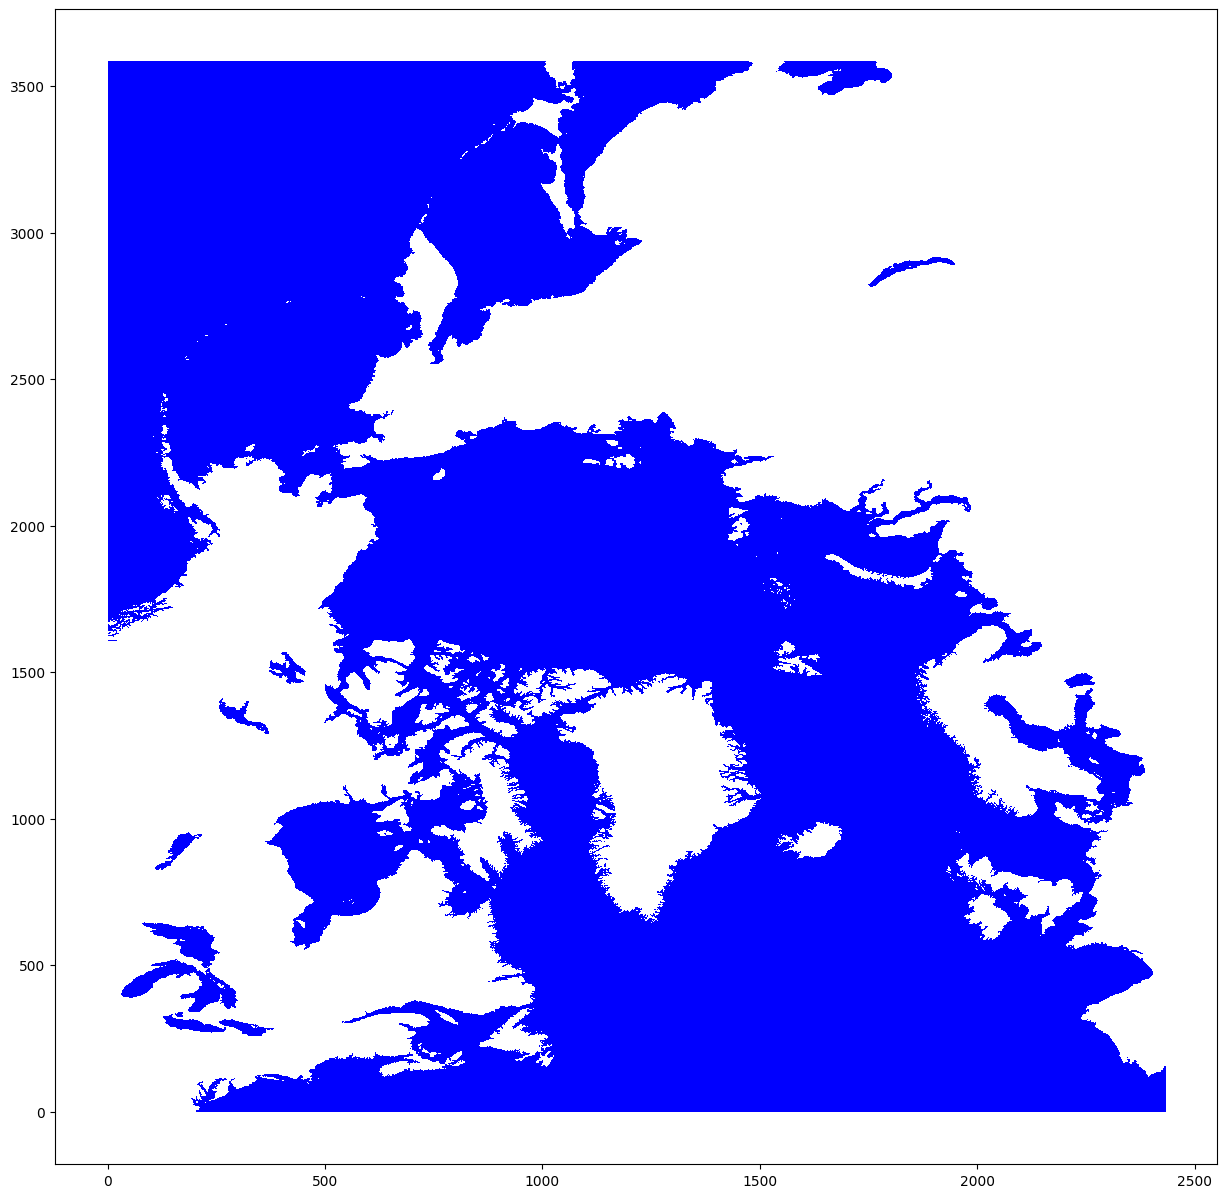

In [10]:
plt.figure(figsize=(15, 15))
plt.plot(points_array[:, 1], points_array[:, 0], 'b,')

## Выделение Охотского моря

In [11]:
sea=[]
p = path.Path([(2500,750), (3000, 700),(3250,800),(3400, 1030), (3000, 1050), (3000,1300),(2600,1300)])  

for points in points_array:
    if (p.contains_points([(points[0], points[1])])[0] == True):
            sea.append(points)


In [13]:
sea_array = np.asarray(sea)

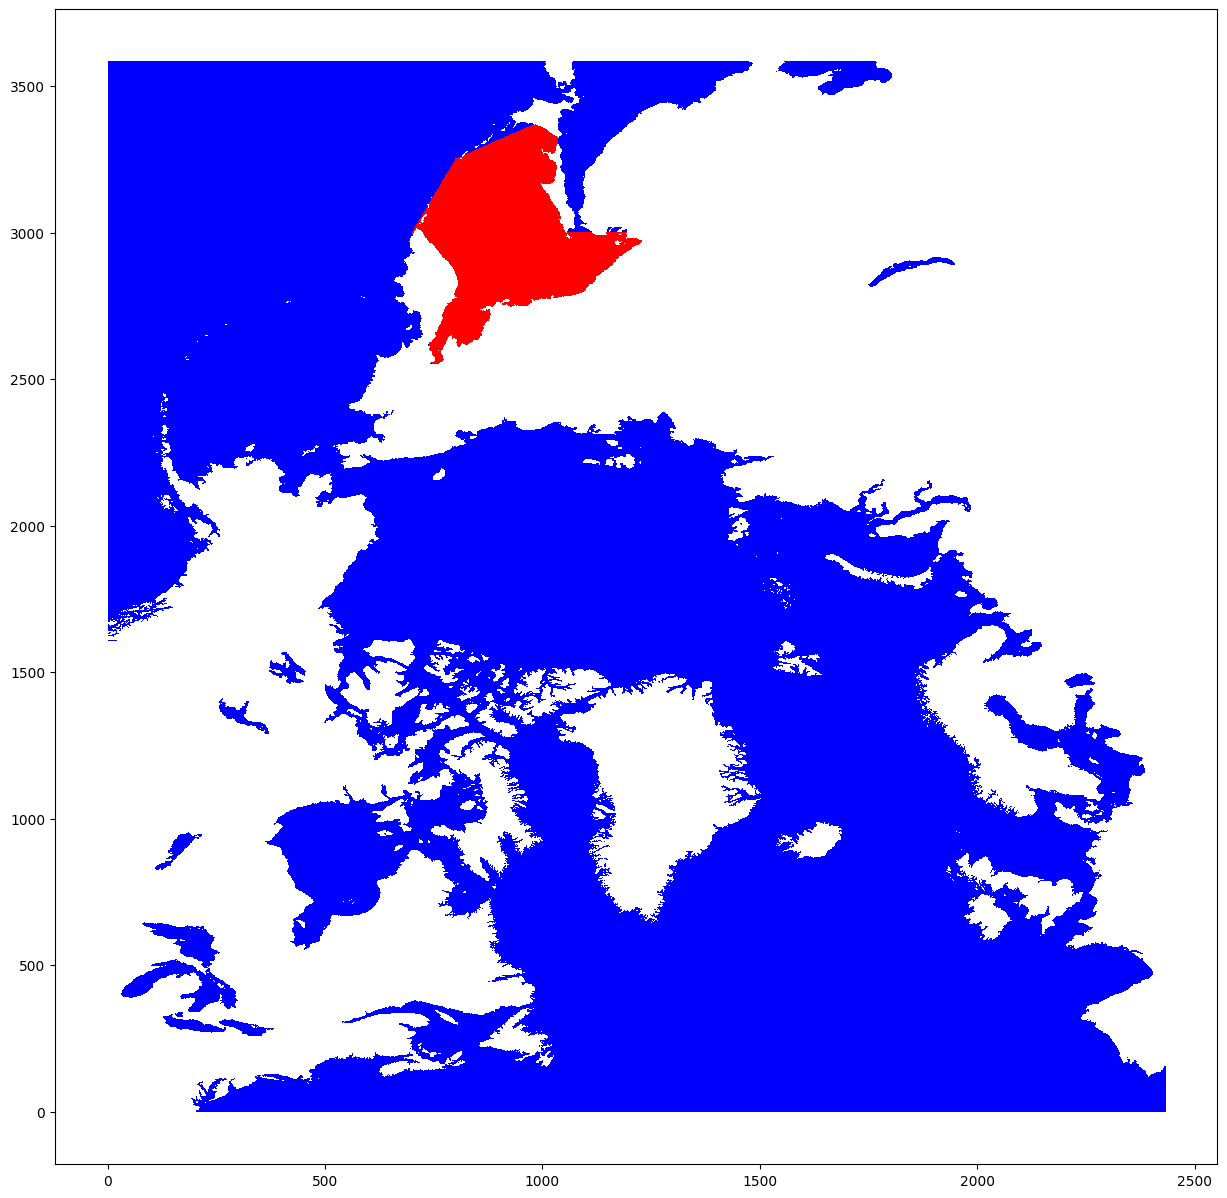

In [14]:
plt.figure(figsize=(15, 15))
colors=['c,','m,','b,','g,','r,','y,']
plt.plot(points_array[:, 1], points_array[:, 0], 'b,')
plt.plot(sea_array[:, 1], sea_array[:, 0], 'r,')

## Выделение моря Лаптевых

In [28]:
sea=[]
p = path.Path([(2500,1150), (2250, 1600),(2200,1450),(1950,1450),(2200, 1170)])  

for points in points_array:
    if (p.contains_points([(points[0], points[1])])[0] == True):
            sea.append(points)

In [29]:
sea_array = np.asarray(sea)

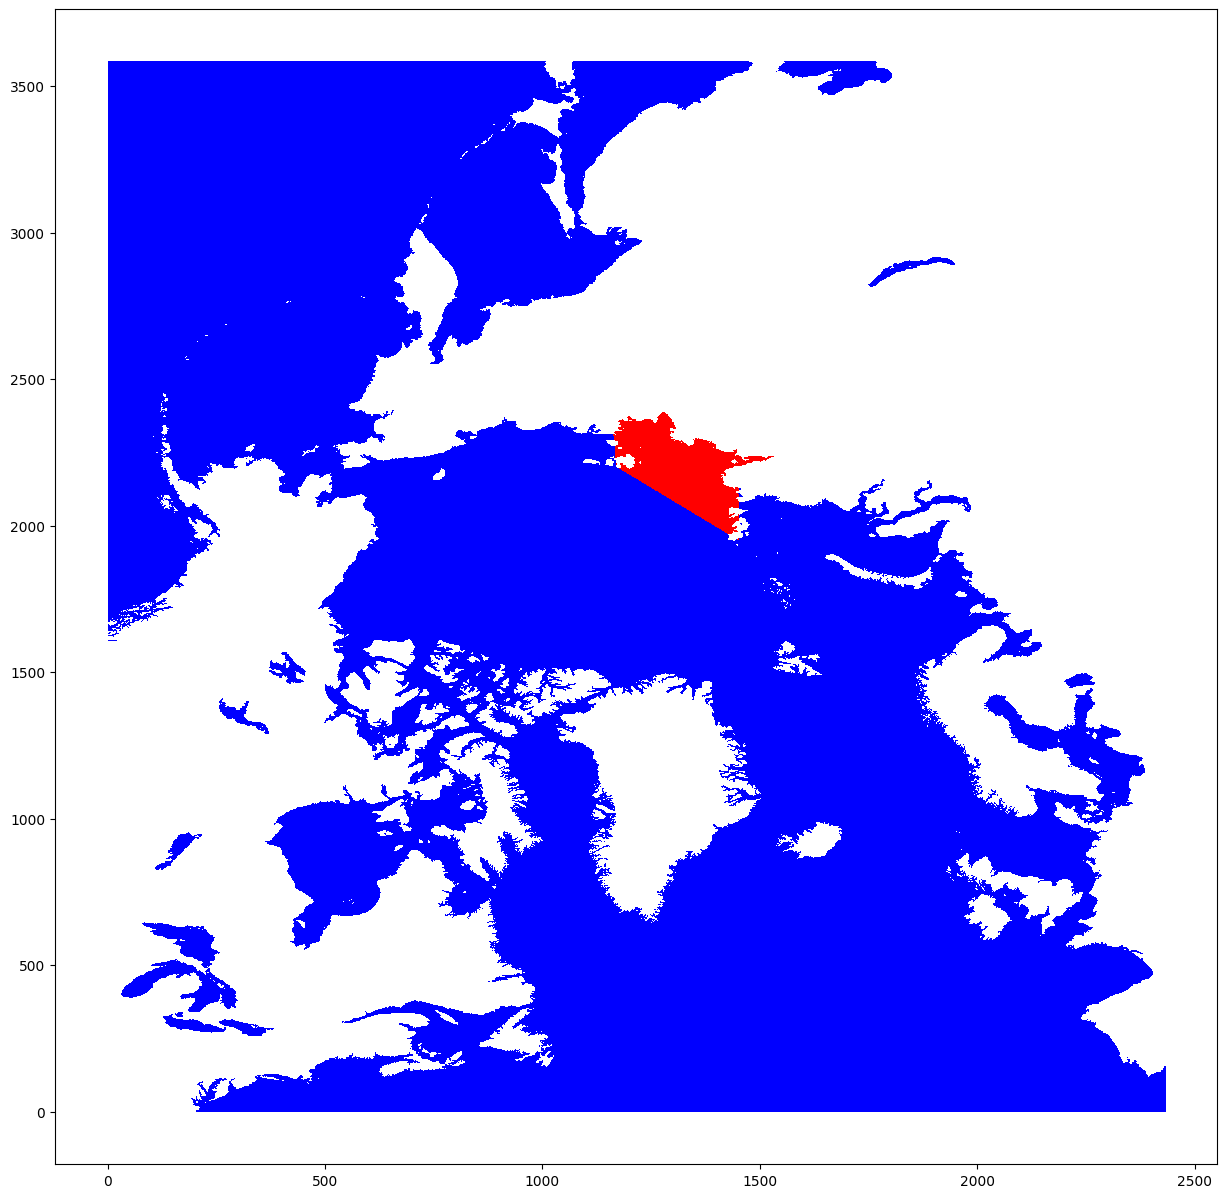

In [30]:
plt.figure(figsize=(15, 15))
colors=['c,','m,','b,','g,','r,','y,']
plt.plot(points_array[:, 1], points_array[:, 0], 'b,')
plt.plot(sea_array[:, 1], sea_array[:, 0], 'r,')

## Разделение на доп секторы

In [ ]:
list_polos=[]
kol_polos=50
MIN=min(sea_array[:,1])
MAX=max(sea_array[:,1])
tolshina=round((MAX-MIN)/kol_polos)
q1=MIN
q2=MIN+tolshina
for i in range(0, kol_polos):
    polosa=[]
    print(q1)
    print(q2)
    
    for tochka in sea_array:
         if (tochka[1]>= q1) and (tochka[1]<q2):
            polosa.append(tochka)
    list_polos.append(polosa)
    q1=q1+tolshina+1
    q2=q2+tolshina+1

    
                
                
        

In [ ]:
list_sektorov=[]
for polosa in list_polos:
        

    
    svektore=50
    kol_sekt=round(len(polosa)/svektore)
    print(svektore)
    print(kol_sekt)
    q1=0
    q2=svektore
    for i in range(0,kol_sekt):
        if (i+1 == kol_sekt):
            sea_sektor=polosa[q1:]
            list_sektorov.append(sea_sektor)

        else:
            sea_sektor=polosa[q1:q2]
            q1=q1+svektore
            q2=q2+svektore
            list_sektorov.append(sea_sektor)
        

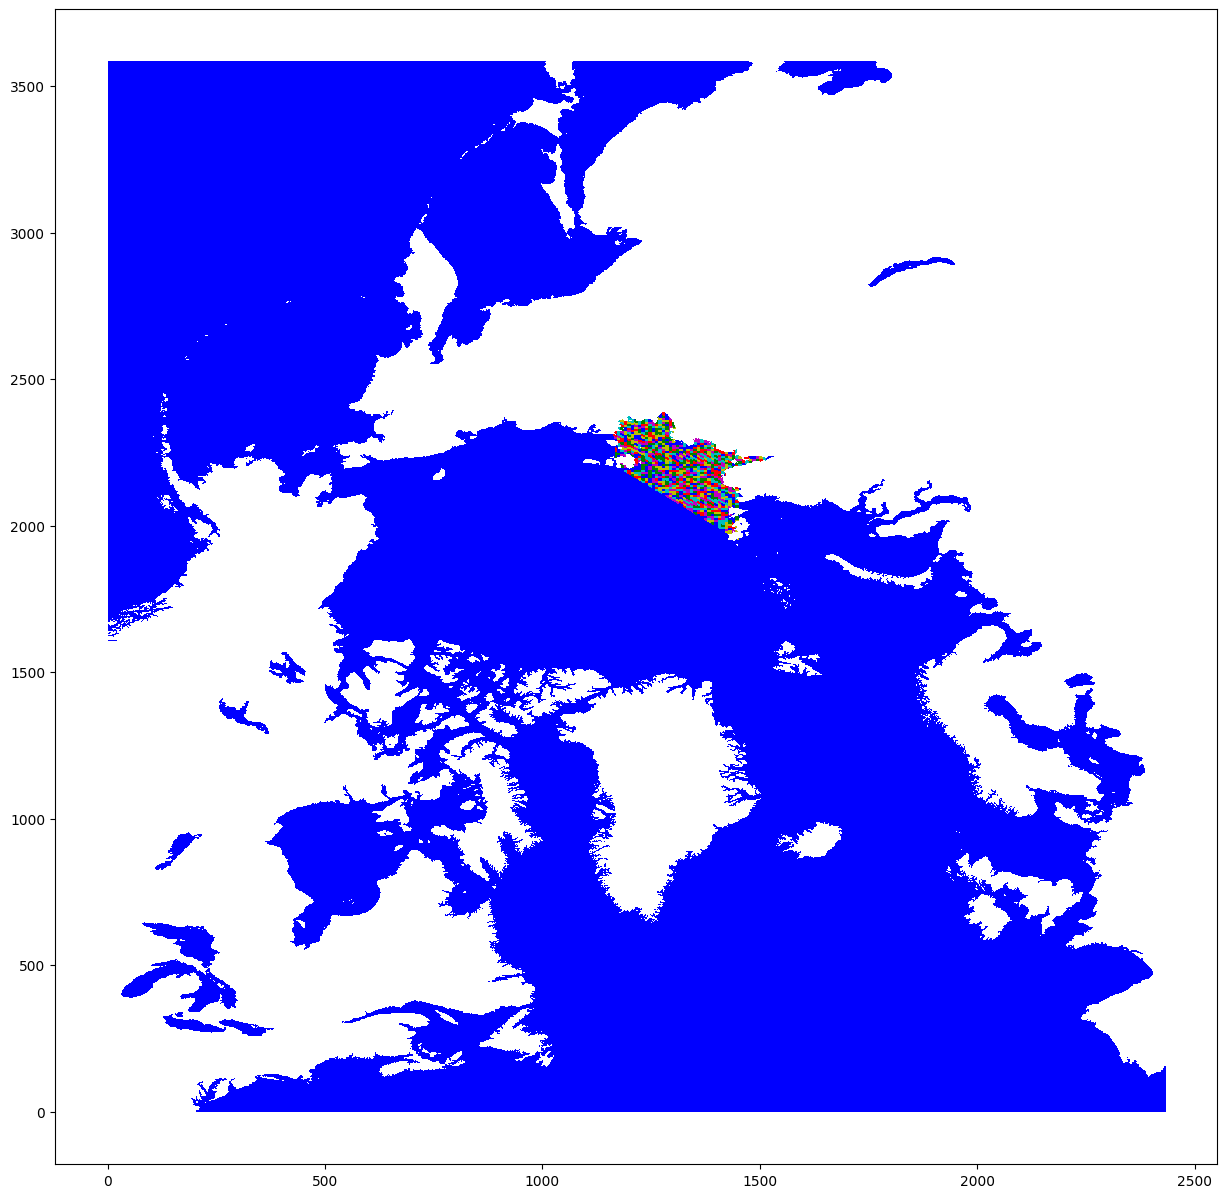

In [44]:
plt.figure(figsize=(15, 15))
colors=['c,','m,','b,','g,','r,','y,']
plt.plot(points_array[:, 1], points_array[:, 0], 'b,')
for i in range(0,len(list_sektorov)):
    
    plt.plot(np.asarray(list_sektorov[i])[:, 1], np.asarray(list_sektorov[i])[:, 0], random.choice(colors))

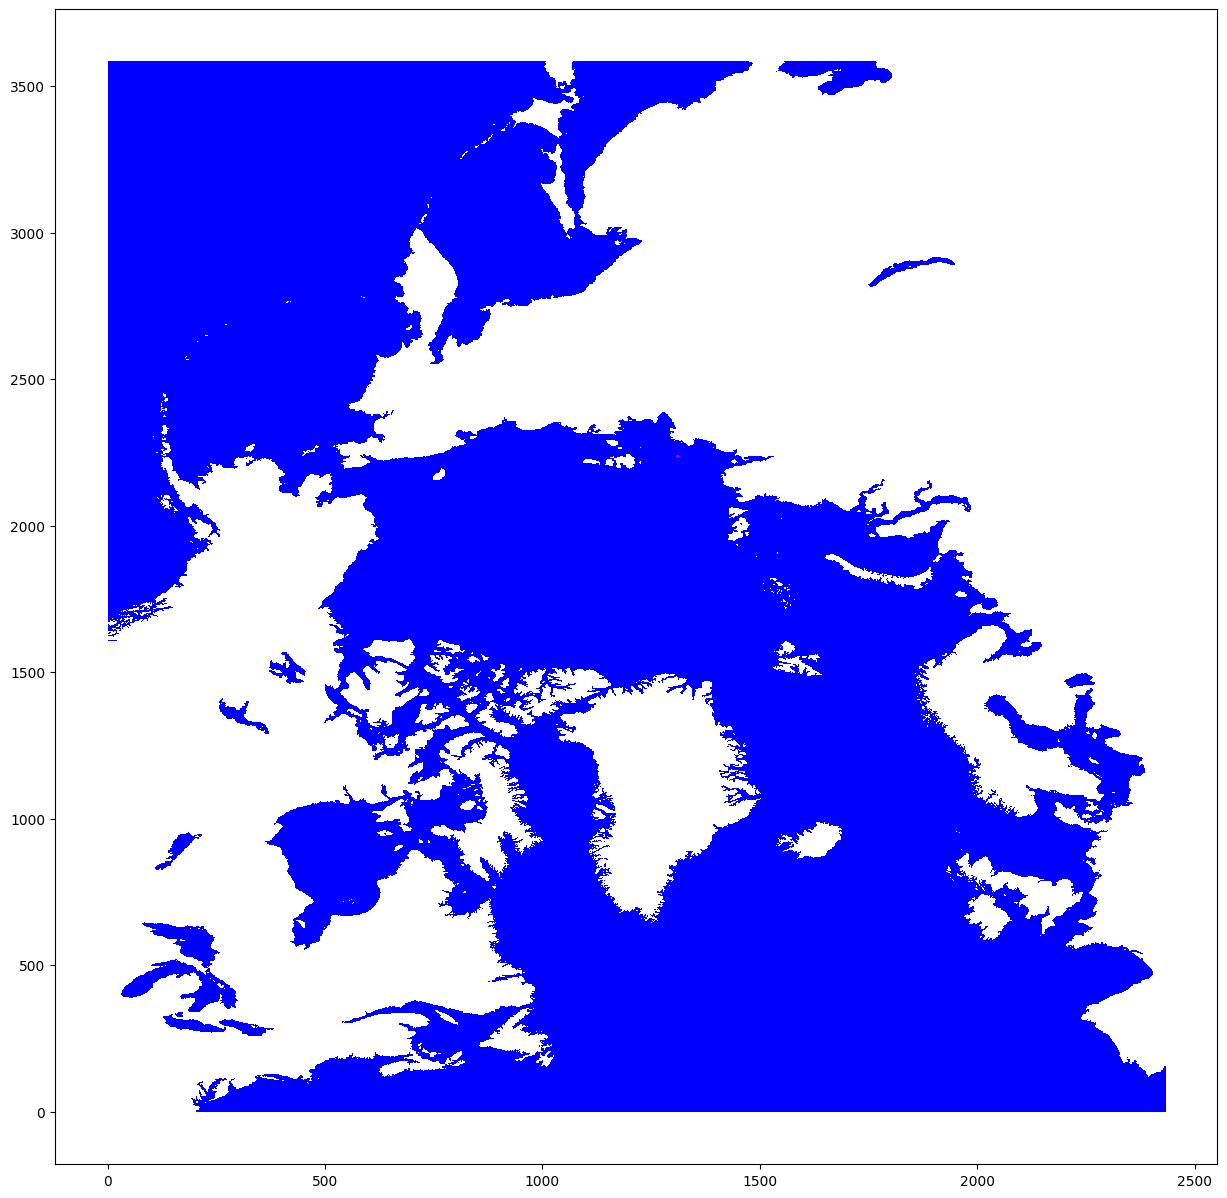

In [52]:
plt.figure(figsize=(15, 15))
colors=['c,','m,','b,','g,','r,','y,']
plt.plot(points_array[:, 1], points_array[:, 0], 'b,')

plt.plot(np.asarray(list_sektorov[500])[:, 1], np.asarray(list_sektorov[500])[:, 0], random.choice(colors))

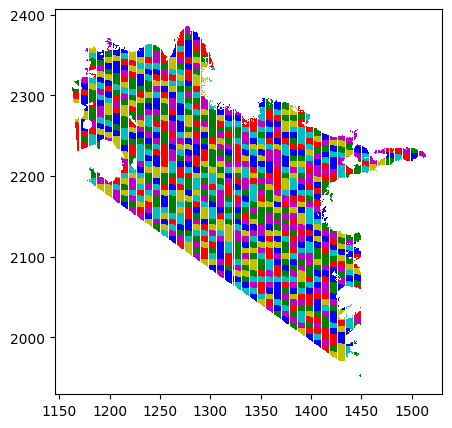

In [47]:
plt.figure(figsize=(5, 5))
colors=['c,','m,','b,','g,','r,','y,']

for i in range(0,len(list_sektorov)):
    
    plt.plot(np.asarray(list_sektorov[i])[:, 1], np.asarray(list_sektorov[i])[:, 0], random.choice(colors))